# Sachin Tendulkar ODI

## Importing Libraries

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

In [130]:
# Reading data
odi=pd.read_csv("b:/dataset/analysis/sachin_odi.csv")

## Understanding the data

In [131]:
# Checking info
odi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   batting_score    463 non-null    object
 1   wickets          463 non-null    object
 2   runs_conceded    463 non-null    object
 3   catches          463 non-null    object
 4   stumps           463 non-null    object
 5   opposition       463 non-null    object
 6   ground           463 non-null    object
 7   date             463 non-null    object
 8   match_result     463 non-null    object
 9   result_margin    462 non-null    object
 10  toss             463 non-null    object
 11  batting_innings  463 non-null    object
dtypes: object(12)
memory usage: 43.5+ KB


In [132]:
# Extracting sample of size 5
odi.sample(5)

,batting_score,wickets,runs_conceded,catches,stumps,opposition,ground,date,match_result,result_margin,toss,batting_innings
81,0,-,-,1,0,v West Indies,Mumbai,20 Oct 1994,won,8 runs,won,2nd
182,15,0,13,1,0,v Australia,Delhi,14 Apr 1998,lost,4 wickets,won,1st
391,55,0,4,0,0,v England,Manchester,30 Aug 2007,lost,3 wickets,won,1st
188,33,2,8,0,0,v Bangladesh,Mumbai,25 May 1998,won,5 wickets,lost,2nd
252,69,1,38,0,0,v New Zealand,Nairobi (Gym),15 Oct 2000,lost,4 wickets,lost,1st


## Data Cleaning

In [133]:
# checking rows with values 'DNB' or 'TDNB'
odi[odi.batting_score.isin(['DNB','TDNB'])].shape

(11, 12)

In [134]:
# removing rows with values 'DNB' or 'TDNB'
odi1=odi[~odi.batting_score.isin(['DNB','TDNB'])]

# removing '*' from batting_score
odi1.batting_score=odi1.batting_score.apply(lambda x:x.split('*')[0])

# replacing '-' values with 0
odi1.replace({'-':0},inplace=True)

odi1.sample(5)

,batting_score,wickets,runs_conceded,catches,stumps,opposition,ground,date,match_result,result_margin,toss,batting_innings
312,83,2,28,0,0,v Kenya,Durban,20 Mar 2003,won,91 runs,won,1st
366,4,0,0,0,0,v Australia,Kuala Lumpur,22 Sep 2006,lost,18 runs,lost,2nd
187,134,0,12,0,0,v Australia,Sharjah,24 Apr 1998,won,6 wickets,won,2nd
457,22,0,0,1,0,v Sri Lanka,Brisbane,21 Feb 2012,lost,51 runs,lost,2nd
127,11,0,28,0,0,v South Africa,Hyderabad (Deccan),17 Oct 1996,lost,47 runs,lost,2nd


## Converting columns to appropriate data types

In [135]:
odi1[['batting_score','wickets','runs_conceded','catches','stumps']]=odi1[['batting_score','wickets','runs_conceded','catches','stumps']].apply(pd.to_numeric)
odi1['date']=pd.to_datetime(odi1['date'])
odi1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 0 to 462
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   batting_score    452 non-null    int64         
 1   wickets          452 non-null    int64         
 2   runs_conceded    452 non-null    int64         
 3   catches          452 non-null    int64         
 4   stumps           452 non-null    int64         
 5   opposition       452 non-null    object        
 6   ground           452 non-null    object        
 7   date             452 non-null    datetime64[ns]
 8   match_result     452 non-null    object        
 9   result_margin    451 non-null    object        
 10  toss             452 non-null    object        
 11  batting_innings  452 non-null    object        
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 45.9+ KB


In [136]:
# removing prefix  'v', stands for versus, from opposition column
odi1.opposition=odi1.opposition.apply(lambda x:x.split('v')[-1])

In [137]:
odi1.head()

,batting_score,wickets,runs_conceded,catches,stumps,opposition,ground,date,match_result,result_margin,toss,batting_innings
0,0,0,0,0,0,Pakistan,Gujranwala,1989-12-18,lost,7 runs,won,2nd
1,0,0,0,0,0,New Zealand,Dunedin,1990-03-01,lost,108 runs,won,2nd
2,36,0,0,0,0,New Zealand,Wellington,1990-03-06,won,1 runs,won,1st
3,10,0,0,1,0,Sri Lanka,Sharjah,1990-04-25,lost,3 wickets,lost,1st
4,20,0,0,0,0,Pakistan,Sharjah,1990-04-27,lost,26 runs,won,2nd


In [138]:
# renaming 'batting_score' column as 'runs'
odi1.rename({'batting_score':'runs'},axis=1,inplace=True)

## Box plot for Runs

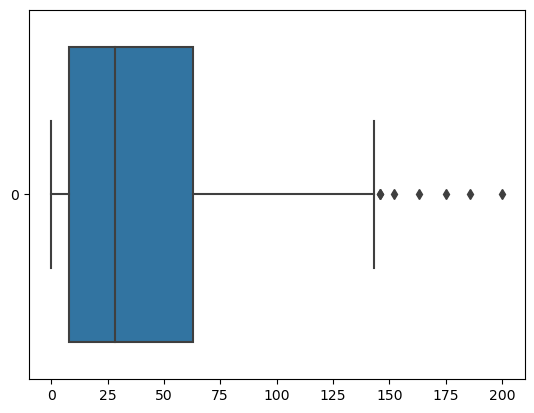

In [139]:
sb.boxplot(odi1.runs,orient='h')
plt.show()

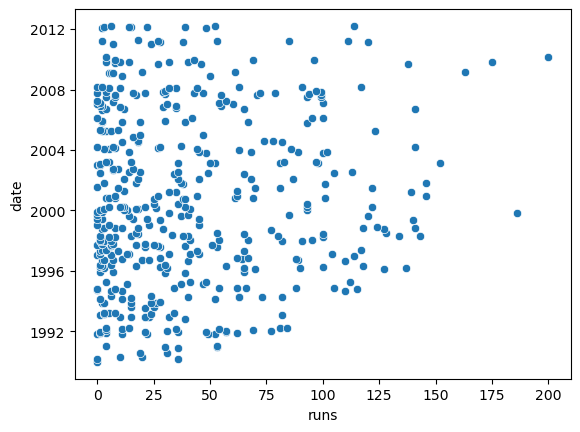

In [140]:
sb.scatterplot(x=odi1.runs,y=odi1.date)
plt.show()

## Bar Graph of yearly runs scored by Sachin

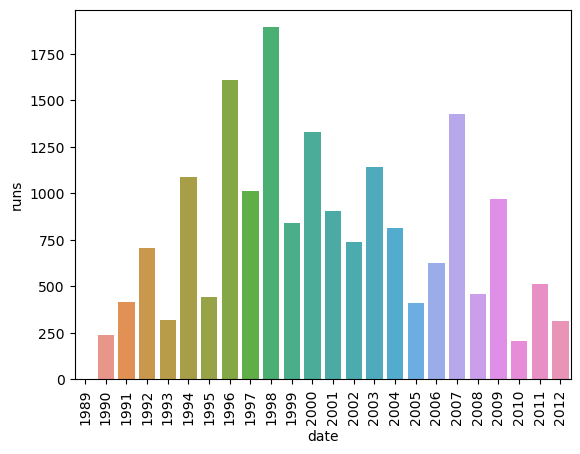

In [141]:
yearly_runs=odi1.groupby(by=odi1.date.dt.year)[['runs']].sum()

yearly_runs.reset_index(inplace=True)

plt.xticks(rotation = 90)
sb.barplot(x=yearly_runs.date,y=yearly_runs.runs)
plt.show()

## Bar Graph of Runs scored against each opposition

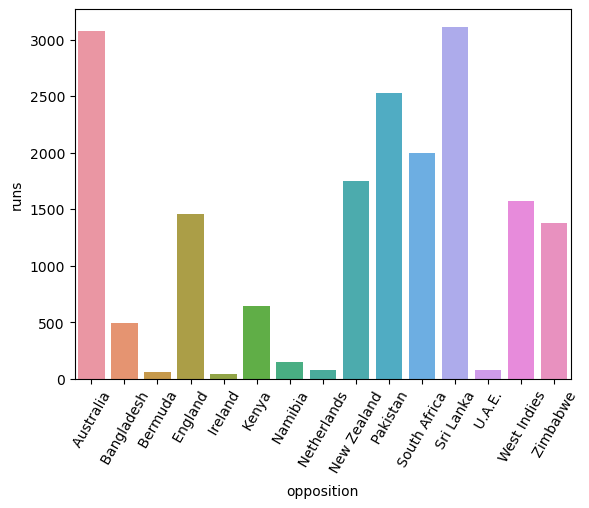

In [142]:
opp_runs=odi1.groupby(by='opposition')[['runs']].sum()
opp_runs.reset_index(inplace=True)
opp_runs

plt.xticks(rotation=60)
sb.barplot(x=opp_runs.opposition,y=opp_runs.runs)
plt.show()

## Histogram for Runs

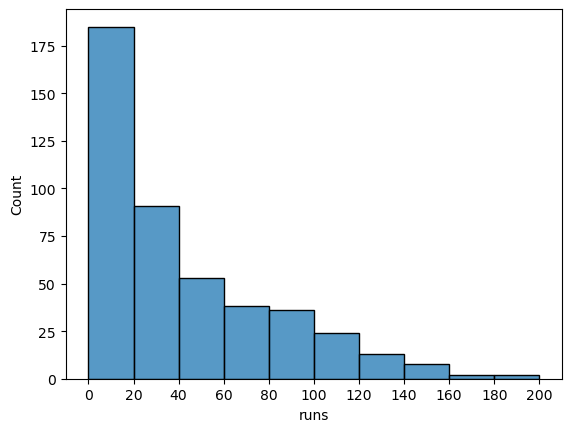

In [143]:
plt.xticks(range(0,210,20))
sb.histplot(odi1.runs,binwidth=20)
plt.show()

## ODI Centuries

In [144]:
odi_cen=odi1[odi1['runs']>=100]
odi_cen.head()

,runs,wickets,runs_conceded,catches,stumps,opposition,ground,date,match_result,result_margin,toss,batting_innings
78,110,0,15,0,0,Australia,Colombo (RPS),1994-09-09,won,31 runs,won,1st
83,115,0,27,0,0,New Zealand,Vadodara,1994-10-28,won,7 wickets,lost,2nd
89,105,0,31,0,0,West Indies,Jaipur,1994-11-11,won,5 runs,won,1st
95,112,0,0,1,0,Sri Lanka,Sharjah,1995-04-09,won,8 wickets,lost,2nd
102,127,0,26,0,0,Kenya,Cuttack,1996-02-18,won,7 wickets,won,2nd


## Match result when sachin hits a century

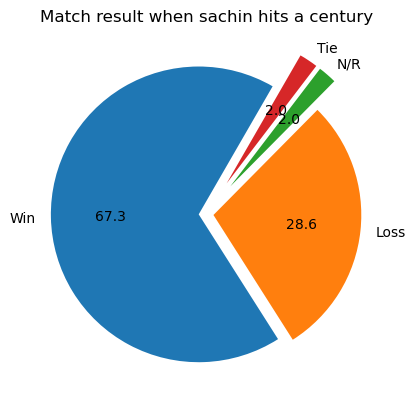

In [145]:
percent=odi_cen['match_result'].value_counts()
labels=['Win','Loss','N/R','Tie']
plt.title("Match result when sachin hits a century")

plt.pie(percent, labels=labels, startangle=60, explode=[0.05,0.05,0.25,0.25],autopct='%.1f')
plt.show()

## Centuries against each team

In [146]:
cen_opp=odi_cen['opposition'].value_counts()
cen_opp

 Australia       9
 Sri Lanka       8
 New Zealand     5
 Pakistan        5
 South Africa    5
 Zimbabwe        5
 West Indies     4
 Kenya           4
 England         2
 Namibia         1
 Bangladesh      1
Name: opposition, dtype: int64

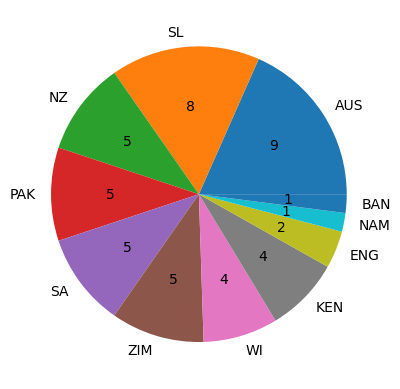

In [164]:
opps=['AUS','SL','NZ','PAK','SA','ZIM','WI','KEN','ENG','NAM','BAN']

def absolute_value(val):
    a  = np.round(val/100*cen_opp.sum(), 0)
    return int(a)

plt.pie(cen_opp, labels=opps, autopct=absolute_value)
plt.show()